In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt    


In [2]:
housing = fetch_california_housing()
df= pd.DataFrame(housing.data,columns=housing.feature_names)
df['Target']=housing.target

In [3]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
x= df.drop("Target", axis=1)
y= df["Target"]

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

In [10]:
#s separate dataset into train and test
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [12]:
x_train.shape, x_test.shape

((14448, 8), (6192, 8))

In [13]:
import seaborn as sns


In [14]:
plt.figure(figsize=(8,8))
corrl= x_train.corr()
corrl

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


<Figure size 800x800 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

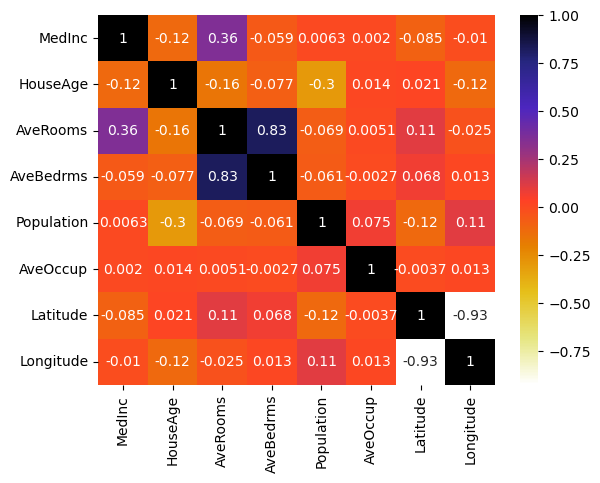

In [15]:
sns.heatmap(corrl, annot= True, cmap=plt.cm.CMRmap_r)
plt.show

In [21]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if abs(corr_metrix.iloc[i, j])> threshold:
                colname=corr_metrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features= correlation(x_train, 0.7)
len(set(corr_features))

2

In [18]:
corr_features

{'AveBedrms', 'Longitude'}

In [19]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79
...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56
